<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm"><b>LAB 1. Structural imaging</b></h1>
    <p style="margin-bottom:0.25cm">Course 240318: <b>Neuroimaging</b>
    <br>
        Master in Neuroengineering and Rehabilitation</p>
    <b> Profs. Carolina Migliorelli & Joan F. Alonso</b>
    <br>
    <br>
</div>

# Introduction

Welcome to the first laboratory session of Neuroimage course. Today, we will learn:

* How to manipulate brain volumetric data (in nifti format)
* How to visualize slices of volumetric data
* How to compute an Histogram and roughly filter white and grey matter
* How to plot tridimensional meshes and atlases
* How to plot two-dimensional atlases

In this notebook, you will find examples that will guide you to solve the proposed excercises. Your solution to the excercises should be delivered in a new jupyter notebook. 

## Getting started

1. First, what we need for this course is the [`nilearn`](https://nilearn.github.io/) package. When we install  `nilearn`, the [`nibabel`](https://nipy.org/packages/nibabel/index.html) package will be also installed.

  If you have not added `nilearn` to the `conda` environment, close this notebook and use the terminal to add it:
  - On **Windows**, use _conda prompt_ or _git bash_; on **Linux** or **MacOS**, use you preferred terminal
  - Install `nilearn` by typing `conda install -c conda-forge nilearn`


2. And second, we will need anatomic data (download the zip file from [ATENEA](https://atenea.upc.edu/)) to plot 3D meshes.

In [1]:
import numpy as np
import nibabel as nib
from nilearn.datasets import MNI152_FILE_PATH
from matplotlib import pyplot as plt

## Reading NIfTI data

One of the most common neuroimage data formats is [NIfTI](https://nifti.nimh.nih.gov/). Using `nibabel`, we will be able to read one of the datasets provided by `nilearn` stored in `MNI152_FILE_PATH`.

Let's print this path to see where the images are stored:

In [2]:
print(MNI152_FILE_PATH)

/Users/macbook/Desktop/anaconda3/envs/env_neuroimage/lib/python3.9/site-packages/nilearn/datasets/data/mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz


Now, we read the image with `nibabel` and we convert it to a numpy matrix:

In [3]:
img = nib.load(MNI152_FILE_PATH)
data = img.get_fdata()
data.shape

(197, 233, 189)

With `data.shape`, we see that the MRI has 189 slices of 197$\times$233 pixels

## Plotting

Although later we will use `nilearn` to plot brain images, let's try first `matplotlib`'s `pyplot`.

Can you detect, in the following image, the white and grey matter?   

The white and the gray matter can be slightly differentiated in the following image.

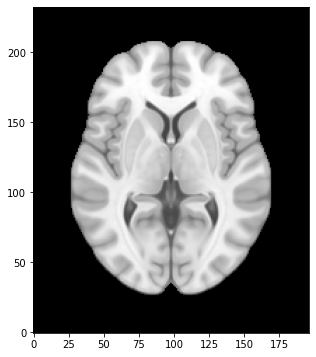

In [4]:
# Plot slice 75 (axial view)
fig1 = plt.figure(figsize=(8, 6))
imgplot = plt.imshow(data[:, :, 75].T, cmap='gray', origin='lower')

<div class="alert alert-block alert-info">
  Note that, to have an axial representation, we transpose the image and set origin to lower.
</div>

<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 1: Plotting with <samp>matplotlib</samp></h2>
</div>

**1. Using `matplotlib`'s `imshow`, plot the _MNI152_ brain slices 25, 50 and 75.**
<div class="alert alert-block alert-info">
    <strong>Add as many markdown and code cells as you need to reply</strong>
</div>

# Plotting with nilearn

To use `nilearn` for plotting, we must use the `img` object loaded with `nibabel`. We also need `nilearn`'s plotting module:

In [5]:
from nilearn import plotting

A good practice when working with python package, is to explore the documentation of the modules. In this url: https://nilearn.github.io/modules/reference.html#module-nilearn.plotting, you will find all the functions available in the plotting module.

Plotting the MRI anatomy with `nilearn` is easy, you just have to use the `plot_anat` function:

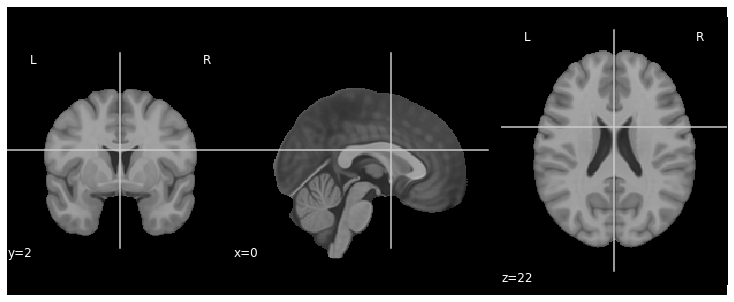

In [6]:
fig2 = plt.figure(figsize=(10, 4))
plotting.plot_anat(img, figure=fig2)

The following cell shows a subplot with the the MNI152 axial brain slices 25, 50 and 75, respecitvely. We can see how as the z-axis value gets increased, the slice can be seen better.

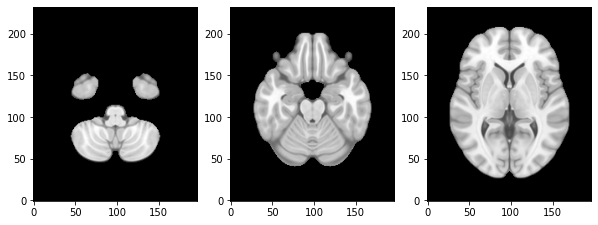

In [7]:
fig_slice, ax_slice = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
imgplot25 = ax_slice[0].imshow(data[:, :, 25].T, cmap='gray', origin='lower')
imgplot50 = ax_slice[1].imshow(data[:, :, 50].T, cmap='gray', origin='lower')
imgplot75 = ax_slice[2].imshow(data[:, :, 75].T, cmap='gray', origin='lower')

**2. In the previous example we use `data[:,:,75].T`. What does `.T` stands for?**      

By adding ".T" at the end of the dataset we transpose the array so that we can see the slice vertically (Figure 1 from the subplot). The original image without being transposed is presented in the second figure from the following subplot.




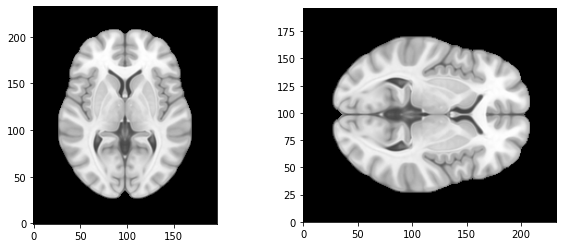

In [8]:
fig_Tp, ax_Tp = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
imgplot25 = ax_Tp[0].imshow(data[:, :, 75].T, cmap='gray', origin='lower')
imgplot50 = ax_Tp[1].imshow(data[:, :, 75], cmap='gray', origin='lower')

**3. In the example, we are observing an axial view. Investigate about sagital and coronal views and plot slice 75 in both cases.**   
The subplot below shows the three slices represented together. First, we see the axial view, which divides the body into upper and lower halves. Then, we observe the coronal plane, which slices the body into front side and backside. Finally, the sagital plane divides the body into left and right halves.

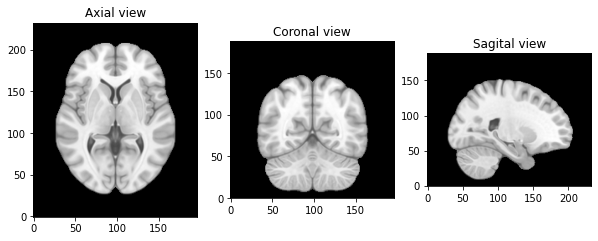

In [11]:
fig_views, ax_views = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axial = ax_views[0].imshow(data[:, :, 75].T, cmap='gray', origin='lower')
ax_views[0].title.set_text("Axial view")
coronal = ax_views[1].imshow(data[:, 75, :].T, cmap='gray', origin='lower')
ax_views[1].title.set_text("Coronal view")
sagital = ax_views[2].imshow(data[75, :, :].T, cmap='gray', origin='lower')
ax_views[2].title.set_text("Sagital view")


In the example, we are observing an axial view. Investigate about sagital and coronal views and plot slice 75 in both cases.

<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 2: Plotting with <samp>nilearn</samp></h2>
</div>

**1. Are the `cut_coords` the same as the slices used with `matplotlib`?**  

As we can see, "cut_coords" results in a 3D point in space, meaning that it represents a given intesection among the XYZ axes. On the other hand, the matplotlib slices represent a given plane along one of the three axes.


<div class="alert alert-block alert-warning">
    To use these display modes, you will have to remove the <samp>cut_coords</samp> parameter.
</div>

<div class="alert alert-block alert-info">
    <strong>Add as many markdown and code cells as you need to reply</strong>
</div>


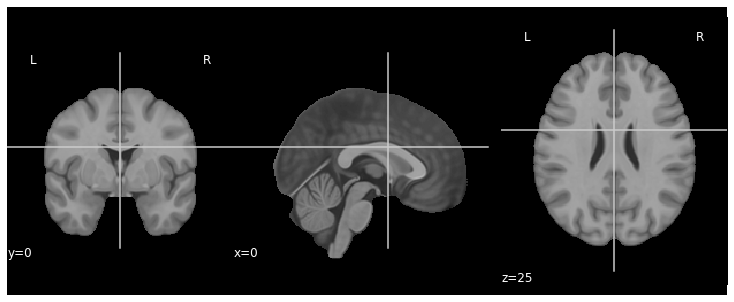

In [10]:
fig3 = plt.figure(figsize=(10,4))
plotting.plot_anat(img, cut_coords=[0, 0, 25], figure = fig3)

**2. Add a title to the image, and change the display mode to `'ortho'`**   
By introducing the `display_mode=ortho`, we can specify the desired coordinates. We can set which MNI coordinates we want to observe in termes of a `(x,y,z)` tuple.

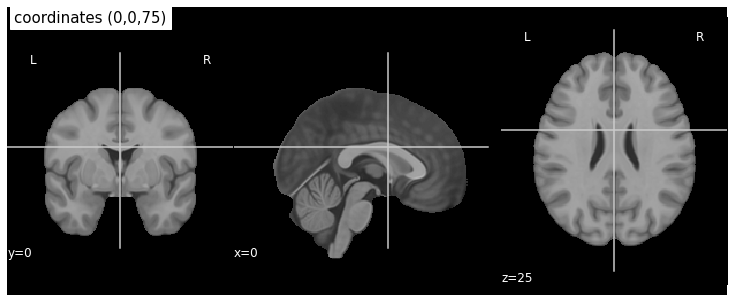

In [18]:
fig3 = plt.figure(figsize=(10,4))
plotting.plot_anat(img, display_mode='ortho', cut_coords=[0, 0, 25], figure = fig3, title="coordinates (0,0,75)")

**3. Explore the other display modes. What do we get by using `display_mode = 'x'`, `display_mode = 'y'` and `display_mode = 'z'`?**   
If a specific direction (x, y or z) is specified in the `display_mode`, we will observe the coordinates of each cut in the given mode. We can specify how many cuts we want to obtain in the `cut_coords` and it will return as many cuts as introduced, representing an evolution of the brain in the sagital, coronal and axial planes (cut_coords=x, y and z, respectively).

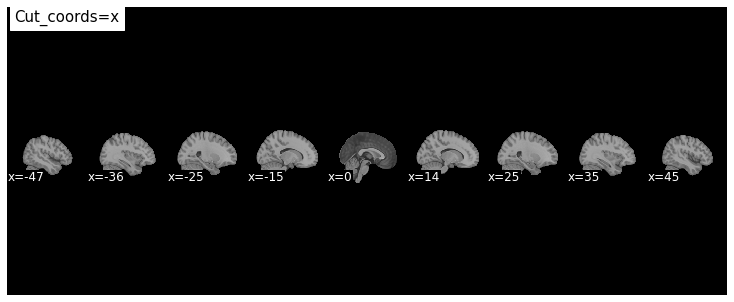

In [20]:
fig3 = plt.figure(figsize=(10,4))
plotting.plot_anat(img, display_mode='x', cut_coords=9, figure = fig3, title="Cut_coords=x") 
#Evolution of the brain along the sagital plane

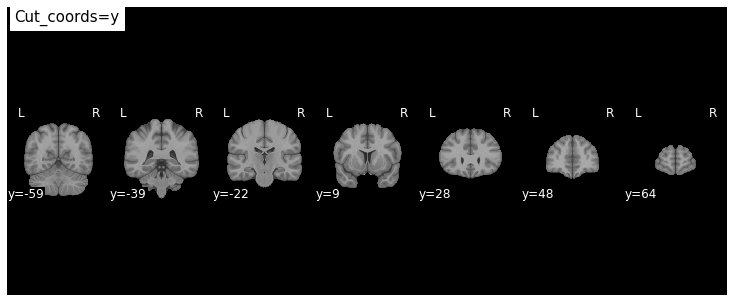

In [21]:
fig3 = plt.figure(figsize=(10,4))
plotting.plot_anat(img, display_mode='y', cut_coords=None, figure = fig3, title="Cut_coords=y")
#Evolution of the brain along the coronal plane

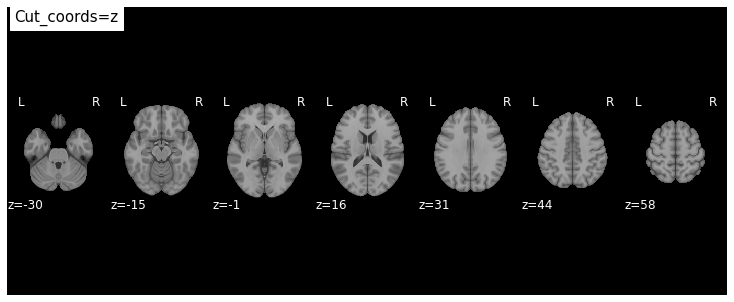

In [22]:
fig3 = plt.figure(figsize=(10,4))
plotting.plot_anat(img, display_mode='z', cut_coords=None, figure = fig3, title="Cut_coords=z")
#Evolution of the brain along the axial plane

# Computing a histogram

A histogram can help us in detecting the boundaries between white and gray matter. To compute the histogram of
all the data, we need to flatten it (convert it into on 1D vector).

To avoid the huge column that corresponds to the black background, we will exclude it from the plot:

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 3.4000e+01, 3.2000e+01,
        4.8000e+01, 1.0200e+02, 6.8000e+01, 1.2200e+02, 1.3200e+02,
        1.4800e+02, 1.6000e+02, 1.6400e+02, 1.6400e+02, 1.8800e+02,
        1.3400e+02, 1.8900e+02, 2.1900e+02, 2.3600e+02, 1.9900e+02,
        2.0100e+02, 2.0000e+02, 1.5600e+02, 1.9600e+02, 1.9900e+02,
        2.5500e+02, 2.4600e+02, 2.8000e+02, 2.4200e+02, 3.0600e+02,
        3.7500e+02, 3.9500e+02, 4.4200e+02, 4.4700e+02, 5.3400e+02,
        6.3900e+02, 7.6900e+02, 9.5800e+02, 1.0930e+03, 1.3060e+03,
        1.2300e+03, 1.1570e+03, 1.1300e+03, 1.0960e+03, 1.0770e+03,
        1.1340e+03, 1.1900e+03, 1.2750e+03, 1.25

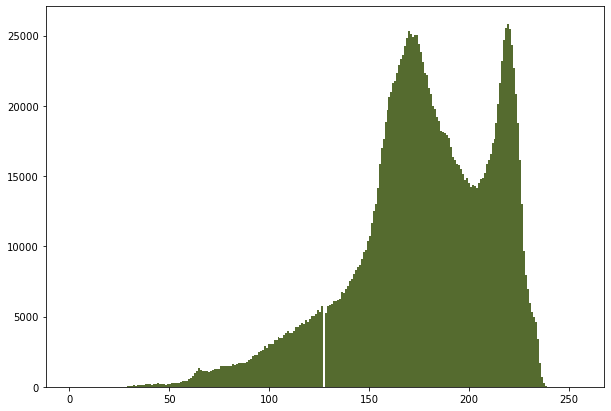

In [23]:
fig4 = plt.figure(figsize=(10, 7))
plt.hist(data.ravel(), bins=256, range=[1, 255], color='darkolivegreen')

From the histogram, we can roughly estimate some thresholds to separate white matter from grey matter.
In the following plot, we will label white matter with 1 (higher values in the histogram) and grey matter will be -1 (lower values on the histogram. The rest of the image will be set to 0. 

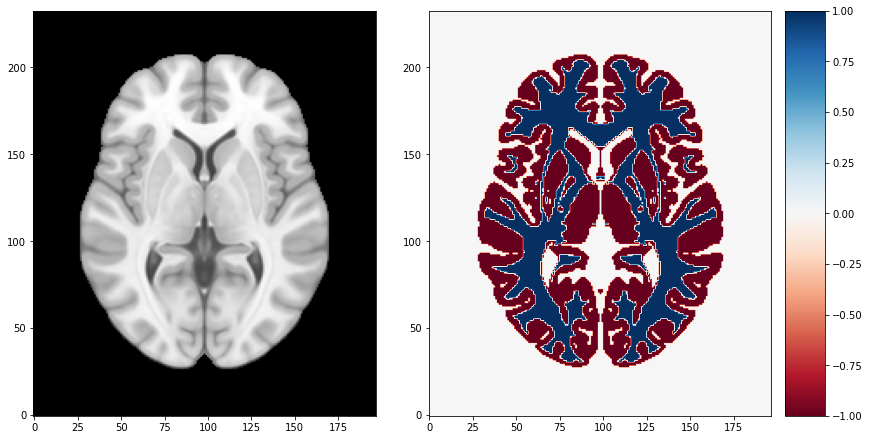

In [24]:
# Create new matrix of zeros
data_color = np.zeros(np.shape(data))
data_color[(data > 200)] = 1
data_color[(data > 150) & (data < 200)] = -1

# Plot both images side to side
fig5, ax5 = plt.subplots(nrows=1, ncols=2, figsize=(
    12, 6), constrained_layout=True)
imgplot0 = ax5[0].imshow(data[:, :, 75].T, cmap='gray', origin='lower')
imgplot1 = ax5[1].imshow(data_color[:, :, 75].T, cmap='RdBu', origin='lower')
fig5.colorbar(imgplot1, ax=ax5[1])

<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 3: Estimating white and gray matter volume</h2>
</div>


1. In the previous example, we have segmented the white and gray matter by observing the histogram. Now, try to think about a way of measuring the volume (in voxels) of grey matter and white matter of this subject.


2. Measure the percentage of gray matter with respect to the whole brain.

<div class="alert alert-block alert-info">
    <strong>Add as many markdown and code cells as you need to reply</strong>
</div>

Knowing that a histogram represents the counts of each voxel value, the way to obtain the volume of grey matter and white matter is by summing up the voxels with a value higher than 200 (white matter) and the voxels with a value between 150 and 200 (grey matter). In the last case we should compute the absolute value as we don't want to obtain a negative volume.   
Considering the whole brain as the addition of the gray matter and white matter, the white matter percentage with respect to the whole brain can be easily obtained, as shown in the cell below.

In [26]:
WM = sum(data_color[(data > 200)])
GM  = sum(abs(data_color[(data > 150) & (data < 200)]))
BV = GM/(WM+GM)*100
print('White Matter volume = ' + str(WM))
print('Gray Matter volume = ' + str(GM))
print('Total GM percentage of whole brain volume = ' + str(BV), '%')

White Matter volume = 552584.0
Gray Matter volume = 959354.0
Total GM percentage of whole brain volume = 63.45194048962325 %


# Plotting 3D meshes

Sometimes, if we use [Freesurfer](https://surfer.nmr.mgh.harvard.edu/) or other segmentation tools, we will obtain a triangular mesh. Working with meshes has some advantages, for example that we work with a tridimensional element that can be easily plotted. 

If you have not downloaded the the zip file from [ATENEA](https://atenea.upc.edu/) do it now. To work with these data, the easiest way unzip its content **into the same folder where this notebook is located**. 

The anatomy folder contain 3 sub-folders:

* _label_: Where the atlases are stored (we will explore atlases later)
* _mri_: Where the MRIs (in .mgz format) are stored
* _surf_: Where the surfaces are stored (we will explore the surfaces in this section)


First, we import `nibabel`'s `freesurfer` module (which allows us to open _freesurfer_ data):

In [13]:
from nibabel import freesurfer

Second, we load the vertices and meshes from `lh.pial`.

<div class="alert alert-block alert-warning">
  Make sure that the path is correct before running the following code!
</div>

<div class="alert alert-block alert-info">
    The vertices (<samp>vert</samp>) are the tridimensional positions that conform the brain.<br>
    The triangles (<samp>faces</samp>) are formed by the relationship of three vertices.
</div>

In [14]:
mesh_path = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial'
vert, faces = freesurfer.io.read_geometry(mesh_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial'

We can plot the surface and meshes though `matplotlib` using `plot_trisurf` (and sometimes this will be enough).

But we will see that by using `nilearn` we will be able to plot the 3D mesh and interact with the plot. For example, with `ax.view_init` we can rotate the brain to obtain different views:

<div class="alert alert-block alert-warning">
    Depending on the computer that runs the following code, the figure may take a few seconds to appear
</div>


Several Python packages allow us to have interactive 3D plots, such as `plotly` or `visbrain`).

The `nilearn` package also allows this interactive plotting of meshes, for example by using the `view_surf` function (which in fact calls `plotly` package):

In [15]:
plotting.view_surf([vert, faces], colorbar=False,
                   black_bg=True, cmap='Pastel2')

NameError: name 'vert' is not defined

In fact, we can call `view_surf` **without loading the vertices and faces**, just using the _surf_path_ where the anatomy is stored as a parameter:

In [16]:
surf_path = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial'
plotting.view_surf(surf_path, colorbar=False, black_bg=True, cmap='Pastel2')

ValueError: No files matching path: C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial

In the surface of the brain, we will be able to plot activated areas or anatomic atlases. In the anatomy folder there is a subfolder called `labels`. These labels are atlases or **parcellations** of the brain. To know more about cortical parcellations, you can visit the [Freesurfer page](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation).

We will plot a parcellation in the surface of the brain and choose a colormap _wisely_.

<div class="alert alert-block alert-info">
    To choose meaningful colormaps, you can visit <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html",>Choosing colormaps in Matplotlib</a>
</div>

In [17]:
surf_path_pial = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial'
atlas_path = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.aparc.a2009s.annot'
plotting.view_surf(surf_path_pial,
                   surf_map=atlas_path,
                   colorbar=False,
                   black_bg=True,
                   cmap='Dark2')

ValueError: No files matching path: C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial

In [18]:
surf_path_white = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.white'
atlas_path =  'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.aparc.a2009s.annot'
plotting.view_surf(surf_path_white,
                   surf_map=atlas_path,
                   colorbar=False,
                   black_bg=True,
                   cmap='Dark2')

ValueError: No files matching path: C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.white

In [19]:
surf_path_sphere = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.sphere'
atlas_path =  'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.aparc.a2009s.annot'
plotting.view_surf(surf_path_sphere,
                   surf_map=atlas_path,
                   colorbar=False,
                   black_bg=True,
                   cmap='Dark2')

ValueError: No files matching path: C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.sphere

Using `nibabel`'s freesurfer we can read annotation files and select only some
of the labels that we want to plot.

* _labels_: a label indicating a region of the atlas for each vertex of the mesh
* _ctab_: a color for each name
* _names_: the anatomic name of each region of the atlas

Now, imagine that we only want to plot the occipital and temporal poles:

In [20]:
labels, ctab, names = freesurfer.read_annot(atlas_path)
# print(names) to explore all available
names_to_plot = [b'Pole_occipital', b'Pole_temporal']
idx_to_plot = []
for n in names_to_plot:
    idx_to_plot.append(names.index(n))
print(idx_to_plot)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.aparc.a2009s.annot'

The occipital and temporal poles correspond to indexes 43 and 44. So, instead of feeding the whole atlas to `view_surf`, we will only use the labels that are equal to 43 or 44.

First, we will create a custom colormap to have a gray brain and 2 colored regions:

In [21]:
from matplotlib.colors import ListedColormap


new_cmap = ListedColormap([(0.6, 0.6, 0.6, 1.0),
                           (0.9, 0.9, 0.1, 1.0),
                           (0.5, 0.1, 0.5, 1.0)])
labels_to_plot = np.zeros(len(labels))
for color_idx, idx in enumerate(idx_to_plot):
    labels_to_plot[labels == idx] = color_idx+1

plotting.view_surf(surf_path_pial,
                   surf_map=labels_to_plot,
                   colorbar=True,
                   black_bg=True,
                   cmap=new_cmap,
                   symmetric_cmap=False)

NameError: name 'labels' is not defined

<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 4: Plotting 3D surfaces</h2>
</div>

1. Explore the _anatomy_ folder. In the _label_ and _surf_ subfolders we cand find files that are named _lh_ and _rh_. What do _lh_ and _rh_ stand for?   

    _While _lh_ stands for the left hemispherium, _rh_ refers to the right hemispherium_


2. Which is the difference between _pial_ and _white_ anatomies? and _sphere_? Plot them to see the differences. 
   
    _Pial corresponds to the representation of the brain surface (GM), useful to locate the external areas, white is the white matter (WM) and it can be used to see the WM connections between different brain surface areas. Finally, sphere represents the area that's being observed in a shperical fashion, which could be useful to compliments other data._
       
   
3. Explore the different atlases in the _anatomy_ folder. _BA_ stands for Broadmann areas. Read the Broadmann areas atlas for the left hemisphere and plot the regions _BA1_, _BA2_ and _BA3a_. To which region of the brain do these areas belong?

<div class="alert alert-block alert-info">
    <p>You can look up information about the Broadmann areas on the internet.</p>
</div>
<div class="alert alert-block alert-warning">
    <p>Modify the colormap to the needs of the new plots!<p>
</div>

In [22]:
atlas_path = 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.BA.annot'
labels, ctab, names = freesurfer.read_annot(atlas_path)
print(names)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/label/lh.BA.annot'

In this case, we have 3 regions to plot in the brain, so we will have to modify the color map by adding one new color. We have decided to add a kind of blue. The plot shows the BA1, BA2 and BA3a represented in yellow, purple and blue, respectively. The first image plots it in the grey matter and the second one in the white matter. The latter seems to represent better the BA3a area.

In [23]:
names_to_plot = [b'BA1', b'BA2', b'BA3a']
idx_to_plot = []
for n in names_to_plot:
    idx_to_plot.append(names.index(n))
print(idx_to_plot)

NameError: name 'names' is not defined

In [24]:
new_cmap = ListedColormap([(0.6, 0.6, 0.6, 1.0),
                           (0.9, 0.9, 0.1, 1.0),
                           (0.5, 0.1, 0.5, 1.0),
                          (0.2, 0.2, 0.6, 1.0)])
labels_to_plot = np.zeros(len(labels))
for color_idx, idx in enumerate(idx_to_plot):
    labels_to_plot[labels == idx] = color_idx+1

plotting.view_surf('C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.pial',
                   surf_map=labels_to_plot,
                   colorbar=True,
                   black_bg=True,
                   cmap=new_cmap,
                   symmetric_cmap=False)

NameError: name 'labels' is not defined

In [25]:
new_cmap = ListedColormap([(0.6, 0.6, 0.6, 1.0),
                           (0.9, 0.9, 0.1, 1.0),
                           (0.5, 0.1, 0.5, 1.0),
                          (0.2, 0.2, 0.6, 1.0)])
labels_to_plot = np.zeros(len(labels))
for color_idx, idx in enumerate(idx_to_plot):
    labels_to_plot[labels == idx] = color_idx+1

plotting.view_surf('C:/Users/marta/OneDrive/Escritorio/Neuroimagen/anatomy/anatomy/surf/lh.white',
                   surf_map=labels_to_plot,
                   colorbar=True,
                   black_bg=True,
                   cmap=new_cmap,
                   symmetric_cmap=False)

NameError: name 'labels' is not defined

# Plotting atlases on top of 2D MRIs

In the `nilearn` package you will find several atlases mapped to 2D volumetric images, now we will learn how to plot these atlases over a normalized MRI.

Atlases are often useful when observing functional activations or structural connections between brain areas. We will elaborate on this in the following sessions!

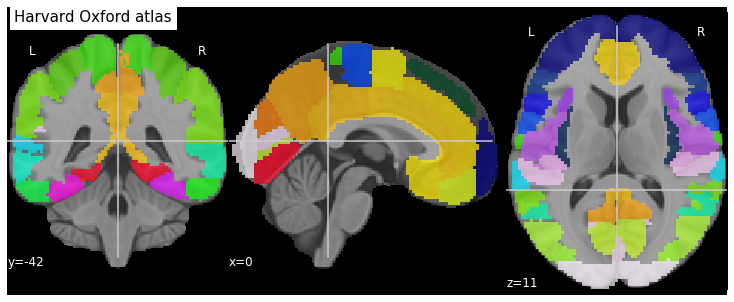

In [26]:
from nilearn import datasets


dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps  # where the maps are stored

# Plot the same MRI we were using as an example above
fig7 = plt.figure(figsize=(10, 4))
plotting.plot_roi(atlas_filename, bg_img=img,
                  title="Harvard Oxford atlas", figure=fig7)

<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 5: Explore <samp>ICBM</samp> dataset</h2>
</div>

Similarly to the previous example, download ICBM dataset included in `nilearn`:
```python
icbm = datasets.fetch_icbm152_2009()
```

1. Explore the dataset (see `icbm.description`). Which segmentations do you have? Which anatomical templates do you have?   
_The datasets contain three segmentations: gray matter, white matter and cerebrospinal fluid. The anatomical templates are the proton-density, T1, T2 and relaxed T2._

2. Plot the proton density, T1 and T2 maps. Observe and comment on the differences.


3. Plot the gray matter mask and white matter mask.

4. Obtain the gray matter and white matter masks (remember to use `nib.load` and `get_fdata`). Measure the gray matter volume and the white matter volume, as well as the percentage of gray matter with respect to the whole brain.

<div class="alert alert-block alert-info">
    <strong>Add as many markdown and code cells as you need to reply</strong>
</div>

_The following cells contain the proton density, T1 and T2 maps._  
_PD:_   
_- A long TR results in a high water signal, but a short TE means that this is less than the signal of a T2 scan. The signal of water is in the middle_   
_- A long TR results in a high fat signal, and short TE means this signal is higher than on a T2-WI. Fat appears bright_

_T1:_    
_- Water has a long T1. T1-WI uses a short TR so the signal from water is still low, therefore, water appears dark_   
_- Fat has a short T1, so even though the TR is short the signal is still high and fat appears bright_   

_T2:_   
_- T2-WI uses a long TE so the signal from water is high, therefore, water appears bright_   
_- Fat has a short T2, so at a long TE the signal is less bright and it will be darker than water_

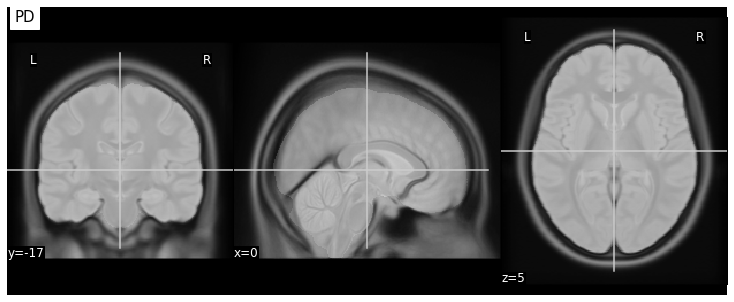

In [30]:
icbm = datasets.fetch_icbm152_2009()
atlas_filename_icbm_pd = icbm.pd  # where the maps are stored

# Plot the same MRI we were using as an example above
fig7 = plt.figure(figsize=(10, 4))
plotting.plot_roi(atlas_filename_icbm_pd, bg_img=img,
                  title="PD", figure=fig7, cmap='gray')

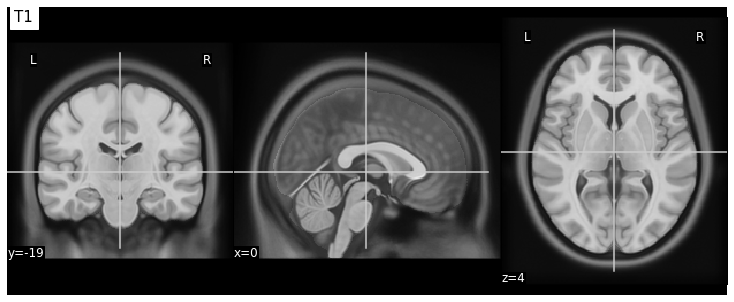

In [29]:
icbm = datasets.fetch_icbm152_2009()
atlas_filename_icbm_T1 = icbm.t1  # where the maps are stored

# Plot the same MRI we were using as an example above
fig8 = plt.figure(figsize=(10, 4))
plotting.plot_roi(atlas_filename_icbm_T1, bg_img=img,
                  title="T1", figure=fig8, cmap="gray")

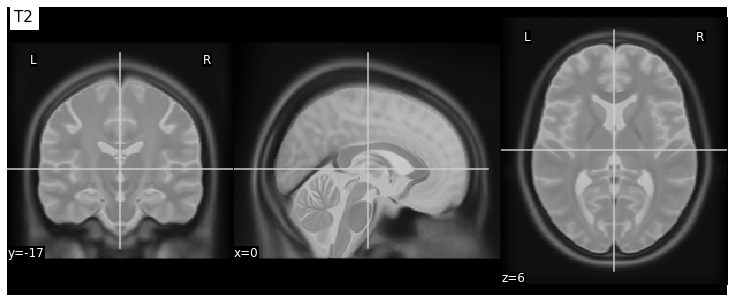

In [32]:
icbm = datasets.fetch_icbm152_2009()
atlas_filename_icbm_T2 = icbm.t2 # where the maps are stored

# Plot the same MRI we were using as an example above
fig8 = plt.figure(figsize=(10, 4))
plotting.plot_roi(atlas_filename_icbm_T2, bg_img=img,
                  title="T2", figure=fig8, cmap='gray')

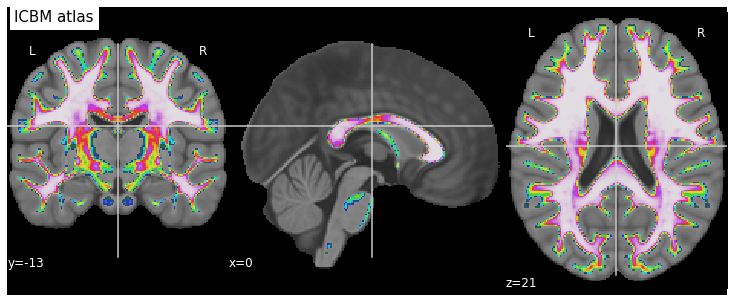

In [34]:
atlas_filename_icbm_mask_wm = icbm.wm  # where the maps are stored

# Plot the same MRI we were using as an example above
fig8 = plt.figure(figsize=(10, 4))
a = plotting.plot_roi(atlas_filename_icbm_mask_wm, bg_img=img,
                  title="ICBM atlas", figure=fig8)

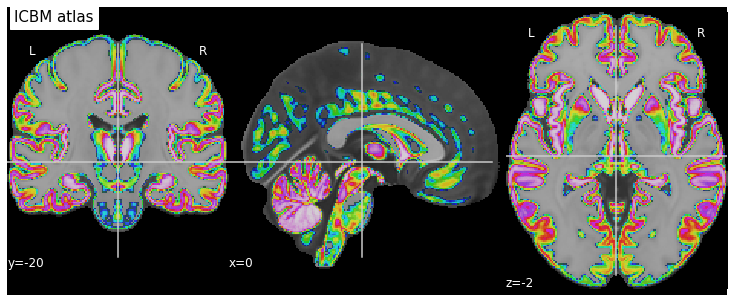

In [35]:
atlas_filename_icbm_mask_gm = icbm.gm  # where the maps are stored

# Plot the same MRI we were using as an example above
fig8 = plt.figure(figsize=(10, 4))
a = plotting.plot_roi(atlas_filename_icbm_mask_gm, bg_img=img,
                  title="ICBM atlas", figure=fig8)

In [36]:
icbm.description

'ICBM 152 Atlas\n\n\nNotes\n-----\nReferences atlases intended for spatial normalization, registration, and\nsegmentation of MRI data. These atlases were generated from large ensembles\nof MRI data in an unbiased fashion. MRI data from templates are derived from\n"a truly normal, well characterized population."\n\n\nContent\n-------\n    :\'csf\': probabilistic map for cerebrospinal fluid\n    :\'gm\': probabilistic map for gray matter\n    :\'wm\': probabilistic map for white matter\n    :\'pd\': proton density-weighted anatomical templates (non-linear average)\n    :\'t1\': T1-weighted anatomical template (non-linear average)\n    :\'t2\': T2-weighted anatomical template (non-linear average)\n    :\'t2_relax\': T2-weighted/relaxed anatomical template\n    :\'eye_mask\': average mask for eyes\n    :\'face_mask\': average mask for face\n    :\'mask\': average mask for brain\n\n\nReferences\n----------\nFor more information see:\nhttp://www.bic.mni.mcgill.ca/ServicesAtlases/ICBM152NLin2

In [37]:
#GM AND WM VOLUMES, HISTOGRAMA??
img2 = nib.load(icbm.pd)
data2 = img.get_fdata()
data2.shape

(197, 233, 189)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 3.4000e+01, 3.2000e+01,
        4.8000e+01, 1.0200e+02, 6.8000e+01, 1.2200e+02, 1.3200e+02,
        1.4800e+02, 1.6000e+02, 1.6400e+02, 1.6400e+02, 1.8800e+02,
        1.3400e+02, 1.8900e+02, 2.1900e+02, 2.3600e+02, 1.9900e+02,
        2.0100e+02, 2.0000e+02, 1.5600e+02, 1.9600e+02, 1.9900e+02,
        2.5500e+02, 2.4600e+02, 2.8000e+02, 2.4200e+02, 3.0600e+02,
        3.7500e+02, 3.9500e+02, 4.4200e+02, 4.4700e+02, 5.3400e+02,
        6.3900e+02, 7.6900e+02, 9.5800e+02, 1.0930e+03, 1.3060e+03,
        1.2300e+03, 1.1570e+03, 1.1300e+03, 1.0960e+03, 1.0770e+03,
        1.1340e+03, 1.1900e+03, 1.2750e+03, 1.25

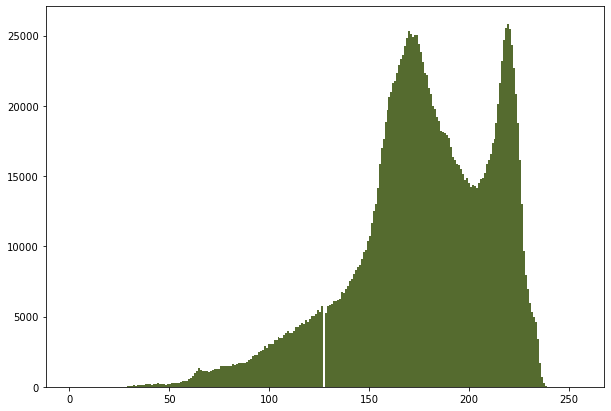

In [38]:
fig5 = plt.figure(figsize=(10, 7))
plt.hist(data2.ravel(), bins=256, range=[1, 255], color='darkolivegreen')

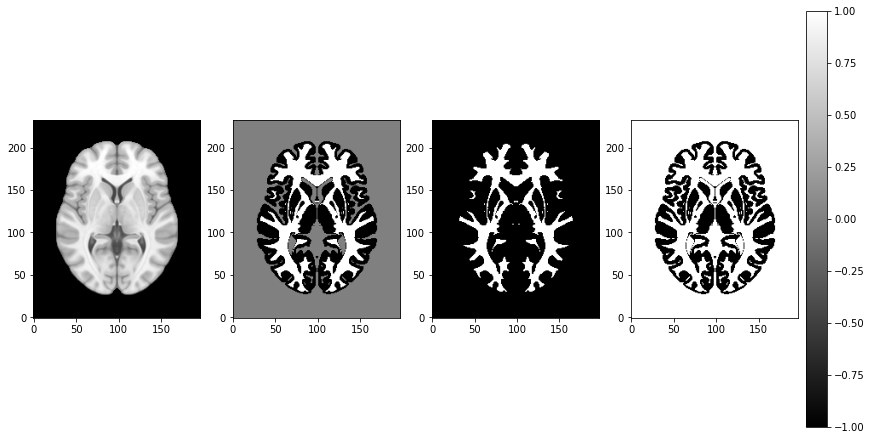

In [61]:
data_color2 = np.zeros(np.shape(data2))
GM_mask = np.zeros(np.shape(data2))
WM_mask = np.zeros(np.shape(data2))
GM_mask[(data2 > 200)] = 1
WM_mask[(data2 > 150) & (data2 < 200)] = -1
data_color2[(data2 > 200)] = 1
data_color2[(data2 > 150) & (data2 < 200)] = -1

# Plot both images side to side
fig6, ax6 = plt.subplots(nrows=1, ncols=4, figsize=(
    12, 6), constrained_layout=True)
imgplot2 = ax6[0].imshow(data2[:, :, 75].T, cmap='gray', origin='lower')
imgplot3 = ax6[1].imshow(data_color2[:, :, 75].T, cmap='gray', origin='lower')
imgplot4 = ax6[2].imshow(GM_mask[:,:,75].T, cmap = 'gray', origin = 'lower')
imgplot5 = ax6[3].imshow(WM_mask[:,:,75].T, cmap = 'gray', origin = 'lower')
fig6.colorbar(imgplot3, ax=ax6[3])

In [68]:
WM = sum(data_color2[(data2 > 200)])
GM = sum(abs(data_color2[(data2 > 150) & (data2 < 200)]))
BV = GM/(WM+GM)*100
print('White Matter volume = ' + str(WM))
print('Gray Matter volume = ' + str(GM))
print('Total GM percentage of whole brain volume = ' + str(BV), '%')

White Matter volume = 552584.0
Gray Matter volume = 959354.0
Total GM percentage of whole brain volume = 63.45194048962325 %


<div class="alert alert-block alert-danger", style="border-radius: 70px">
    <h1 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:28px">Exercise 6: Give us feedback!</h1>
</div>

* Did you find easy to follow this lab session?


* Do you think that the following sessions should be easier or do you feel that they could be more complex?


* Do you feel confident with the Python programming and the packages used in this session?

<div class="alert alert-block alert-info">
    <strong>Add as many markdown cells as you need to reply</strong>
</div>